## Linear Regression
In Chapter 1, we looked at a simple regression model of life satisfaction: 

	life_satisfaction = θ0 + θ1 × GDP_per_capita.
    
This model is just a linear function of the input feature GDP_per_capita. θ0 and θ1 are
the model’s parameters.

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term), as shown in Equation 4-1.

	Equation 4-1. Linear Regression model prediction
	y = θ0 + θ1x1 + θ2x2 + ⋯ + θnxn
    	
	• ŷ is the predicted value.

    • n is the number of features.
    
    • xi is the ith feature value.
    
    • θj is the jth model parameter (including the bias term θ0 and the feature weights
    θ1, θ2, ⋯, θn).

This can be written much more concisely using a vectorized form, as shown in Equation 4-2.

    Equation 4-2. Linear Regression model prediction (vectorized form)
    y = hθ x = θ · x
    
    • θ is the model’s parameter vector, containing the bias term θ0 and the feature
    weights θ1 to θn.
    
    • x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.
    
    • θ · x is the dot product of the vectors θ and x, which is of course equal to θ0x0 + θ1x1 + 		θ2x2 + ⋯ + θnxn.
    
    • hθ is the hypothesis function, using the model parameters θ.

    ------------------------------ General Note ------------------------------------------
    
In Machine Learning, vectors are often represented as column vectors, which are 2D arrays with a single column. If θ and x are column vectors, then the prediction is: y = θTx, where θT is the transpose of θ (a row vector instead of a column vector) and θTx is the matrix multiplication of θT and x. It is of course the same prediction, except it is now represented as a single cell matrix rather than a scalar value. In this book we will use this notation to avoid switching between dot products and matrix multiplications.
   
    --------------------------------------------------------------------------------------

Okay, that’s the Linear Regression model, so now how do we train it? Well, recall that training a model means setting its parameters so that the model best fits the training set. For this purpose, we first need a measure of how well (or poorly) the model fits the training data. In Chapter 2 we saw that the most common performance measure of a regression model is the Root Mean Square Error (RMSE) (Equation 2-1). Therefore, to train a Linear Regression model, you need to find the value of θ that minimizes the RMSE. In practice, it is simpler to minimize the Mean Square Error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a function also minimizes its square root).



### The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution - in other words, a mathematical equation that gives the result directly. This is called the Normal Equation.

    • θ is the value of θ that minimizes the cost function.
    
    • y is the vector of target values containing y(1) to y(m).
    
Let’s generate some linear-looking data to test this equation on (Figure 4-1):

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Now let’s compute θ using the Normal Equation. We will use the inv() function from NumPy’s Linear Algebra module (np.linalg) to compute the inverse of a matrix, and the dot() method for matrix multiplication:

In [37]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

	----------------------- OBS ------------------------------
linalg.inv(a)[source]
Compute the (multiplicative) inverse of a matrix.

Given a square matrix a, return the matrix ainv satisfying dot(a, ainv) = dot(ainv, a) = eye(a.shape[0]).

Parameters:
a(…, M, M) array_like
Matrix to be inverted.

Returns:
ainv(…, M, M) ndarray or matrix
(Multiplicative) inverse of the matrix a.

Raises:
LinAlgError
If a is not square or inversion fails.

Ex.:

a = np.array([[[1., 2.], [3., 4.]], [[1, 3], [3, 5]]])
inv(a)

	array([[[-2.  ,  1.  ],

        [ 1.5 , -0.5 ]],
        
       [[-1.25,  0.75],
       
        [ 0.75, -0.25]]])

    ----------------------- OBS ------------------------------
numpy.c_ = <numpy.lib.index_tricks.CClass object>

Translates slice objects to concatenation along the second axis.

This is short-hand for np.r_['-1,2,0', index expression], which is useful because of its common occurrence. In particular, arrays will be stacked along their last axis after being upgraded to at least 2-D with 1’s post-pended to the shape (column vectors made out of 1-D arrays).

Ex.:

np.c_[np.array([1,2,3]), np.array([4,5,6])]
	
    array([[1, 4],
    
       [2, 5],
       
       [3, 6]])
       
       
np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
	
    array([[1, 2, 3, ..., 4, 5, 6]])
    


The actual function that we used to generate the data is y = 4 + 3x(1) + Gaussian noise. Let’s see what the equation found:

In [38]:
theta_best

array([[3.97933812],
       [2.94661011]])

We would have hoped for θ0 = 4 and θ1 = 3 instead of the ones we saw above. Close enough, but the noise made it impossible to recover the exact parameters of the original function. Now you can make predictions using θ:

In [39]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.97933812],
       [9.87255834]])

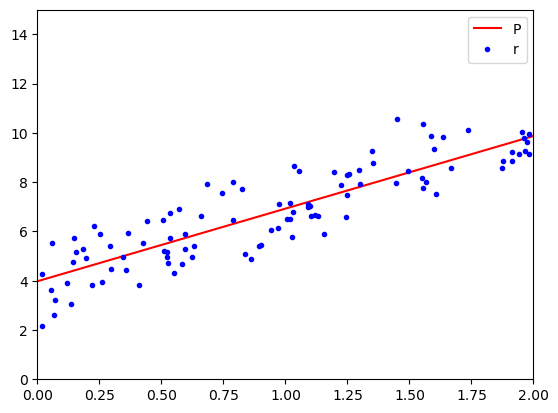

In [49]:
#Let’s plot this model’s predictions:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend('Predictions')
plt.show()

In [50]:
#Performing linear regression using Scikit-Learn is quite simple:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.97933812]), array([[2.94661011]]))

In [51]:
lin_reg.predict(X_new)

array([[3.97933812],
       [9.87255834]])

In [52]:
'''
The LinearRegression class is based on the scipy.linalg.lstsq() function (the
name stands for “least squares”), which you could call directly:
'''
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.97933812],
       [2.94661011]])

In [ ]:
'''
This function computes θ = X

## Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is t tweak parameters iteratively in order to minimize a cost function.

Suppose you are lost in the mountains in a dense fog; you can only feel the slope of the ground below your feet. A good strategy to get to the bottom of the valley quickly is to go downhill in the direction of the steepest slope. This is exactly what Gradient Descent does: it measures the local gradient of the error function with regards to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!

Concretely, you start by filling θ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum (see Figure 4-3).

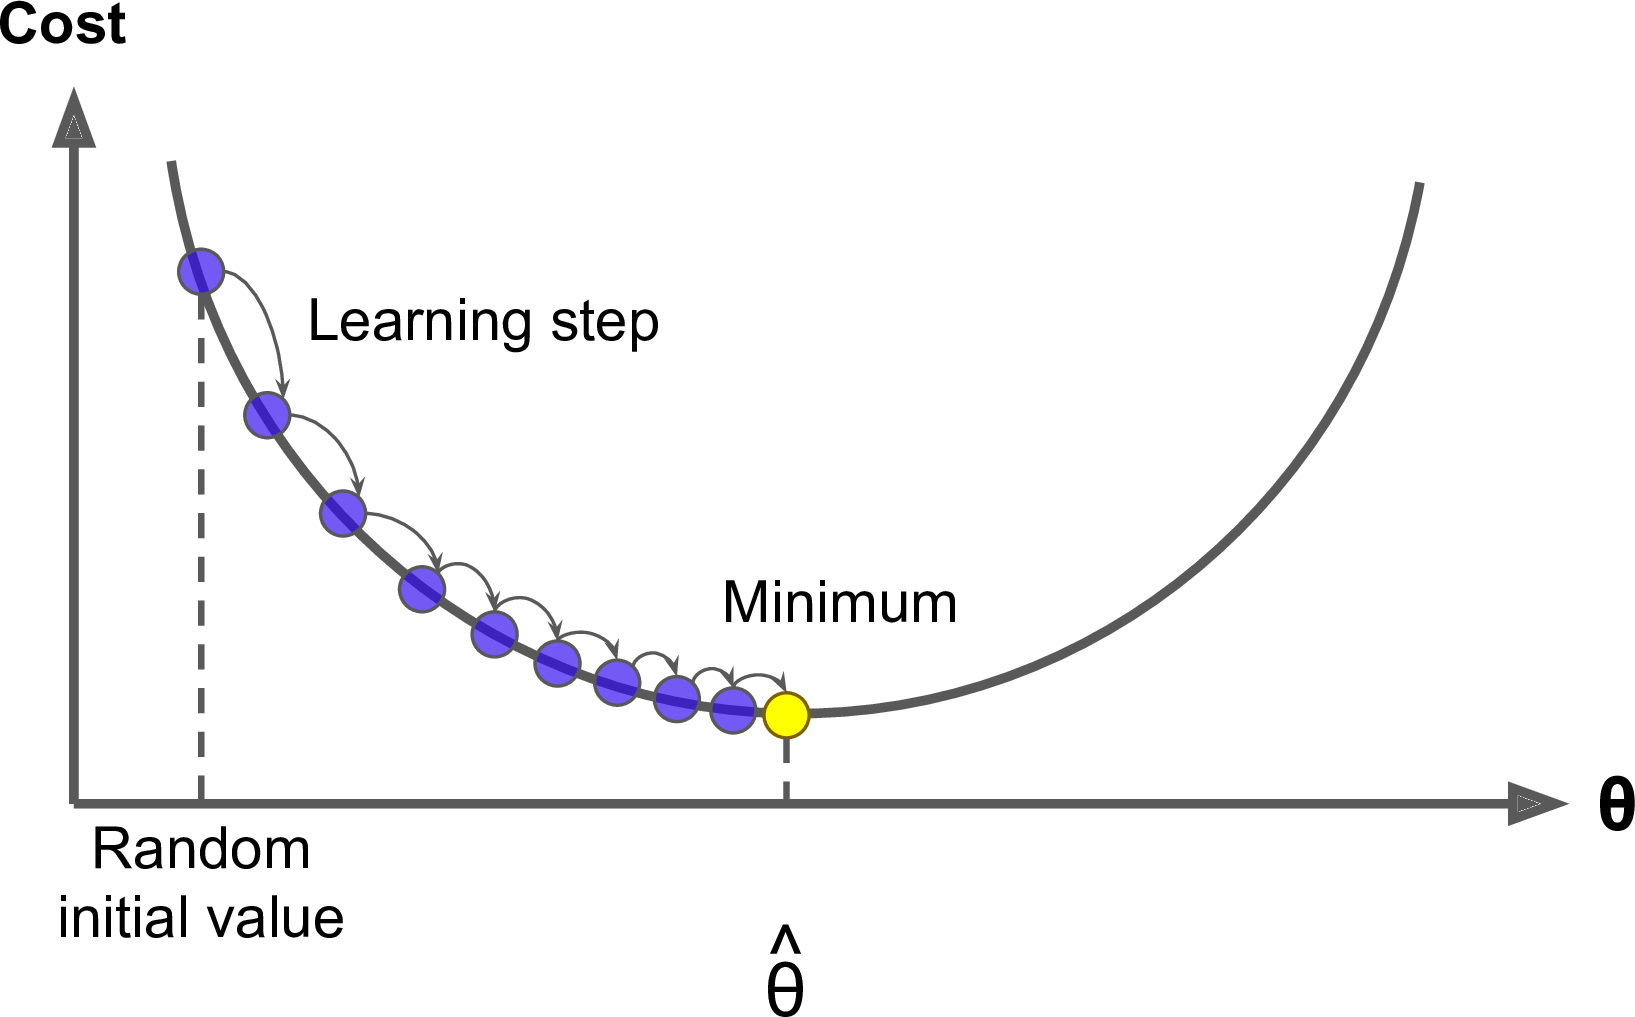

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time (see Figure 4-4).

<img src='LR small.png' style='width:500px;height:350px'/>

On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution (see Figure 4-5).

<img src='LR large.png' style='width:500px;height:350px'/>

Finally, not all cost functions look like nice regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrains, making convergence to the minimum very difficult. Figure 4-6 shows the two main challenges with Gradient Descent: if the random initialization starts the algorithm on the left, then it will converge to a local minimum, which is not as good as the global minimum. If it starts on the right, then it will take a very long time to cross the plateau, and if you stop too early you will never reach the global minimum.

<img src='Gradient Descent pitfalls.png' style='width:500px;height:350px'/>

Fortunately, the MSE cost function for a Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.4 These two facts have a great consequence: Gradient Descent is guaranteed to approach arbitrarily close the global minimum (if you wait long enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if the features have very different scales. Figure 4-7 shows Gradient Descent on a training set where features 1 and 2 have the same scale (on the left), and on a training set where feature 1 has much smaller values than feature 2 (on the right).

<img src='Gradient Descent with and without feature scaling.png' style='width:700px;height:250px'/>

As you can see, on the left the Gradient Descent algorithm goes straight toward the minimum, thereby reaching it quickly, whereas on the right it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time.

    ---------------------------- CAUTION --------------------------------

When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

    ---------------------------------------------------------------------

This diagram also illustrates the fact that training a model means searching for a combination of model parameters that minimizes a cost function (over the training set). It is a search in the model’s parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is: searching for a needle in a 300-dimensional haystack is much trickier than in three dimensions. Fortunately, since the cost function is convex in the case of Linear Regression, the needle is simply at the bottom of the bowl.

### Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter θj. In other words, you need to calculate how much the cost function will change if you change θj just a little bit. This is called a partial derivative. It is like asking “what is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions). Equation 4-5 computes the partial derivative of the cost function with regards to parameter θj, noted ∂/∂θj MSE(θ).

Instead of computing these partial derivatives individually, you can use Equation 4-6 to compute them all in one go. The gradient vector, noted ∇θMSE(θ), contains all the partial derivatives of the cost function (one for each model parameter).



    ------------------------- CAUTION -----------------------------------
    
Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of training data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.
    
    ---------------------------------------------------------------------

Once you have the gradient vector, which points uphill, just go in the opposite direction to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the learning rate η comes into play:6 multiply the gradient vector by η to determine the size of the downhill step.

In [62]:
#Let’s look at a quick implementation of this algorithm:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [63]:
#That wasn’t too hard! Let’s look at the resulting theta:
theta

array([[3.97933812],
       [2.94661011]])

Hey, that’s exactly what the Normal Equation found! Gradient Descent worked perfectly. But what if you had used a different learning rate eta? Figure 4-8 shows the first 10 steps of Gradient Descent using three different learning rates (the dashed line represents the starting point).

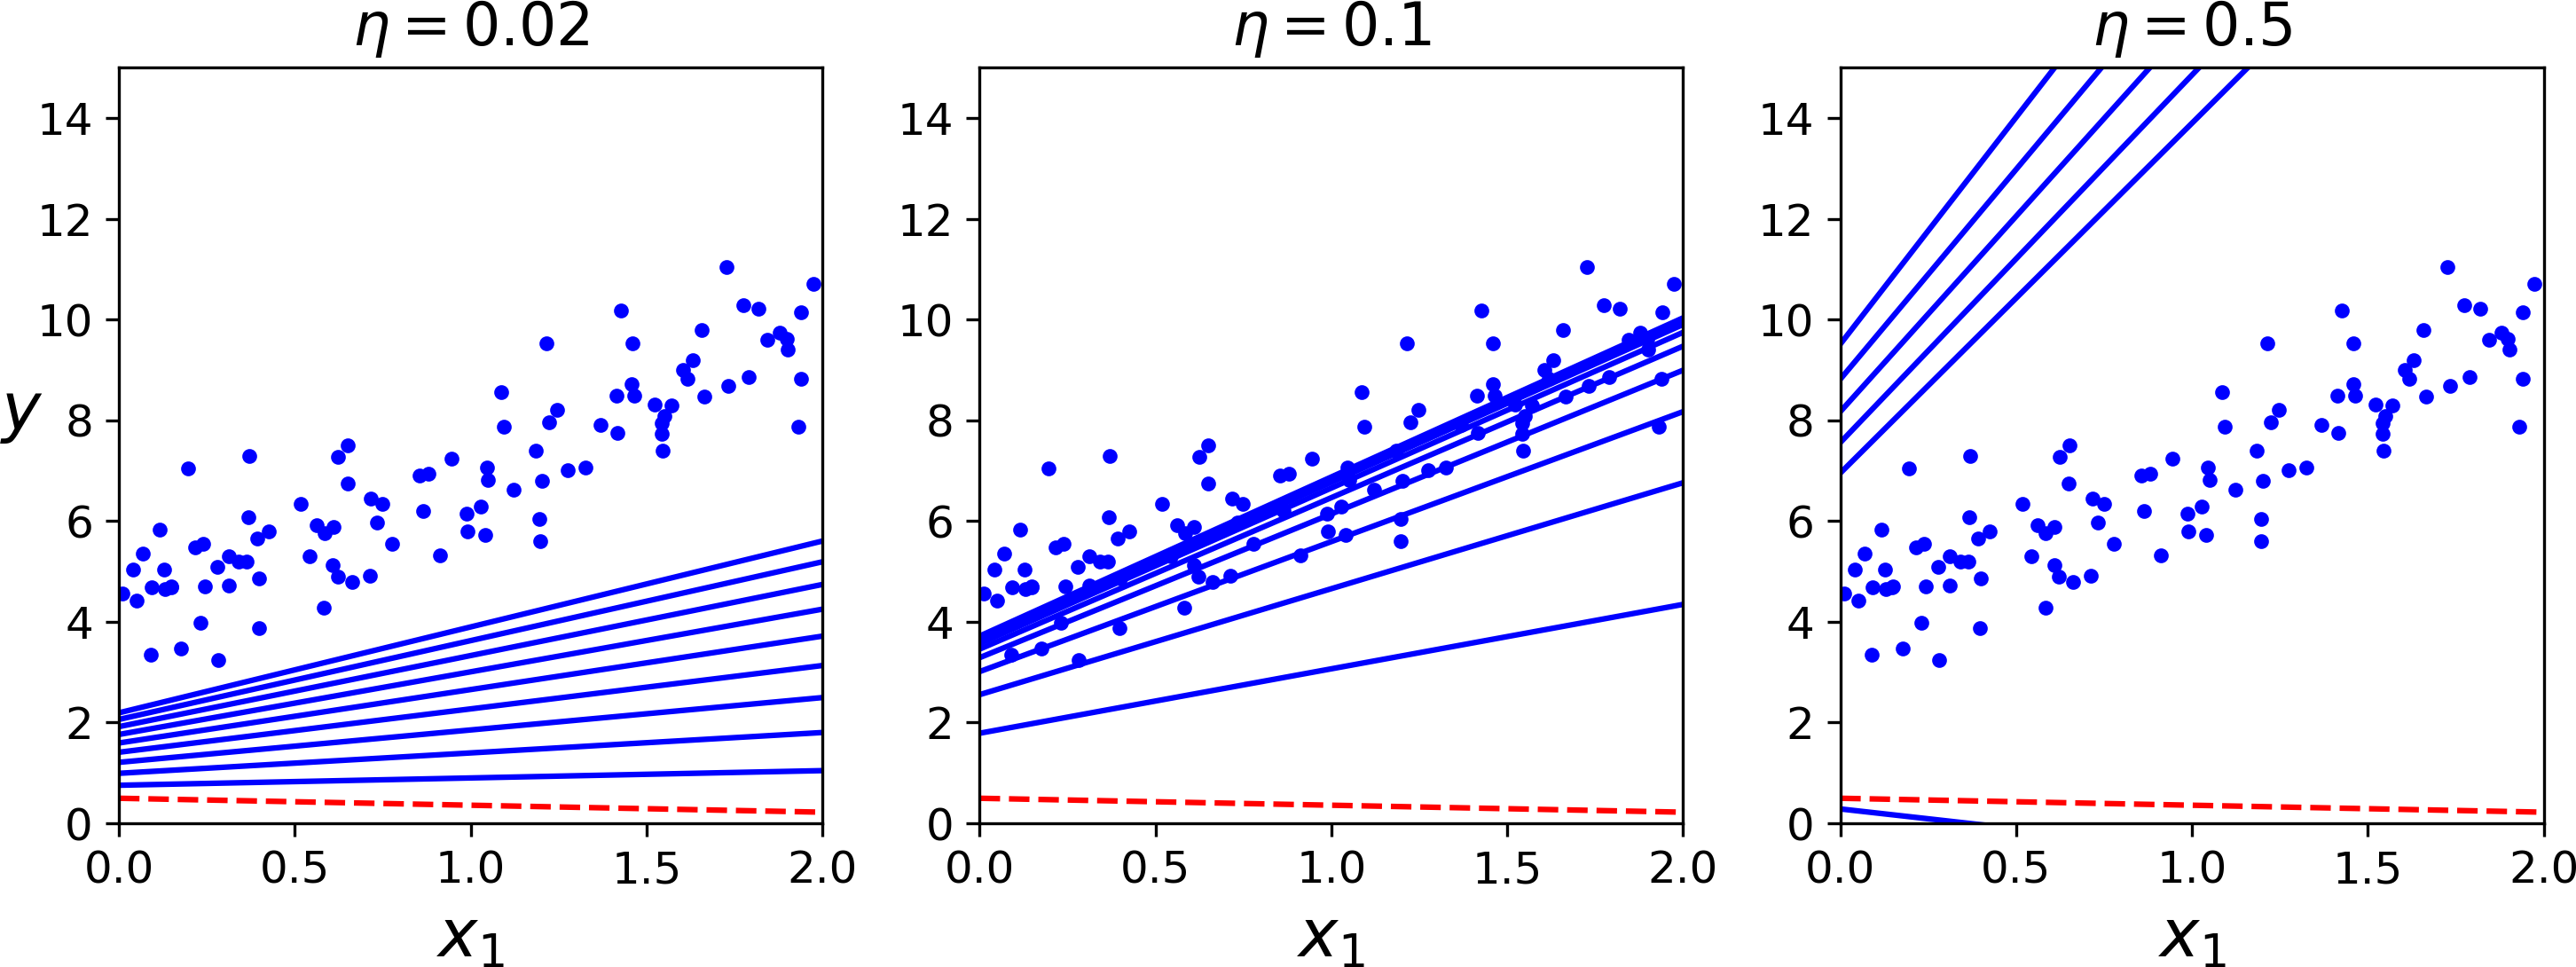

On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time. In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution. On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step. To find a good learning rate, you can use grid search (see Chapter 2). However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops, but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum.

	--------------------- Convergence Rate -------------------------------------

When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), Batch Gradient Descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take O(1/ϵ) iterations to reach the optimum within a range of ϵ depending on the shape of the cost function. If you divide the tolerance by 10 to have a more precise solution, then the algorithm may have to run about 10 times longer.

	-----------------------------------------------------------------------------

### Stochastic Gradient Descent

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an out-of-core algorithm.)

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down (see Figure 4-9). So once the algorithm stops, the final parameter values are good, but not optimal.

<img src='Stochastic Gradient Descent.png' style='width:300px;height:200px'/>

When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. This process is akin to simulated annealing, an algorithm inspired from the process of annealing in metallurgy where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

In [64]:
#This code implements Stochastic Gradient Descent using a simple learning schedule:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients